In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn.cluster import KMeans

(609, 551)


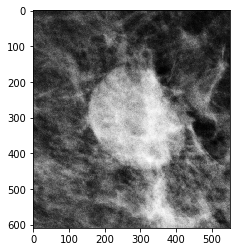

In [4]:
image = r"C:\Users\cory1\OneDrive\Documents\test-folder\abnormaility-cuts\client-1477-LMLO.jpg"
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1ml = 765 - 150
x2ml = 1016 + 150
z1ml = 948 - 150
z2ml = 1257 + 150
diffxml = x2ml - x1ml
diffzml = z2ml - z1ml

LMLOml = np.zeros((diffzml, diffxml))
for j in range(z1ml, z2ml):
    for k in range(x1ml, x2ml):
        LMLOml[j-z1ml,k-x1ml] = beginning_image[j,k]
        
plt.imshow(LMLOml, cmap = 'gray')
print(LMLOml.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO-imagecrop.jpg',LMLOml)
#this just cuts out the abnomaility

(575, 586)


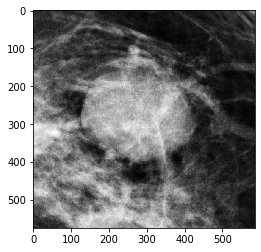

In [5]:
image = r"C:\Users\cory1\OneDrive\Documents\test-folder\abnormaility-cuts\client-1477-LCC.jpg"
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1cc = 460 - 150
x2cc = 746 + 150
y1cc = 727 - 150
y2cc = 1002 + 150
diffxcc = x2cc - x1cc
diffycc = y2cc - y1cc

LMLOcc = np.zeros((diffycc, diffxcc))
for j in range(y1cc, y2cc):
    for k in range(x1cc, x2cc):
        LMLOcc[j-y1cc,k-x1cc] = beginning_image[j,k]
        
plt.imshow(LMLOcc, cmap = 'gray')
print(LMLOcc.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LCC-imagecrop.jpg',LMLOcc)
#this just cuts out the abnomaility

[]

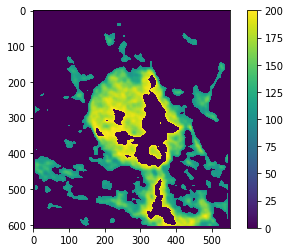

In [6]:
LMLO_density = np.zeros((diffzml,diffxml))
u = 5
for i in range(u, diffzml-u):
    for j in range(u, diffxml-u):
        
        lum = np.sum(LMLOml[i-u:i+u,j-u:j+u])/(len(LMLOml[i-u:i+u,j-u:j+u])**2)
        if 100 <= lum <= 200:
            LMLO_density[i,j] = lum
        else:
            LMLO_density[i,j] = 0
plt.imshow(LMLO_density, cmap = 'gray')
plt.imshow(LMLO_density[:,:])
plt.colorbar()
plt.plot()

[]

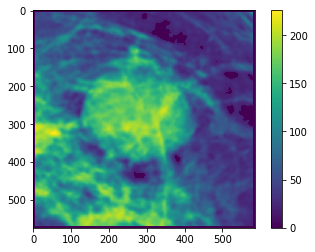

In [7]:
cc_density = np.zeros((diffycc, diffxcc))
u = 5
for i in range(u, diffycc-u):
    for j in range(u, diffxcc-u):
        
        lum = np.sum(LMLOcc[i-u:i+u,j-u:j+u])/(len(LMLOcc[i-u:i+u,j-u:j+u])**2)
        if 20 <=lum <= 240:
            cc_density[i,j] = lum
        else:
            cc_density[i,j] = 0
plt.imshow(cc_density, cmap = 'gray')
plt.imshow(cc_density[:,:])
plt.colorbar()
plt.plot()

In [8]:
x1 = []
y1 = []
for i in range(0,diffycc):
    for j in range(0,diffxcc):
        if cc_density[i,j] >= 1:
            x1.append(i)
            y1.append(j)
x2 = []
z2 = []
for i in range(0,diffzml):
    for k in range(0,diffxml):
        if LMLO_density[i,k] >= 1:
            x2.append(i)
            z2.append(k)
            
x1array = np.array(x1)
x2array = np.array(x2)
y1array = np.array(y1)
z2array = np.array(z2)

disCC = len(x1array)
disMLO = len(x2array)

CC_array = np.zeros((disCC,2))
MLO_array = np.zeros((disMLO,2))

CC_array[:,0] = x1array
CC_array[:,1] = y1array
MLO_array[:,0] = x2array
MLO_array[:,1] = z2array

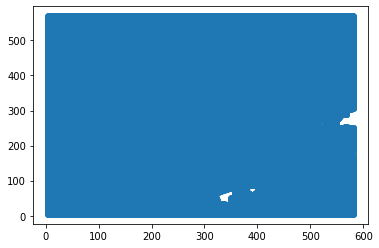

In [9]:
plt.scatter(CC_array[:,1],CC_array[:,0])

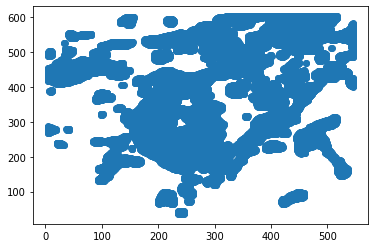

In [10]:
plt.scatter(MLO_array[:,1],MLO_array[:,0])

In [11]:
def positions(i,k,array,clusterA):
# functions creates array of new positions
    new_x = []
    new_z = []
    for di in range(-1,2):
        for dk in range(-1,2):
            x = int(i+di)
            z = int(k+dk)
            val_new = position_check_A(x,z,clusterA)
            val_old = position_check_ini(x,z,array)
            if val_old == 1 and val_new == 0:
                new_x.append(x)
                new_z.append(z)
    return new_x, new_z
            
def position_check_A(x,z,clusterA):
    if clusterA[x,z] > 0:
        return 1
    else:
        return 0
    
def position_check_ini(x,z, array):
    if array[x,z] > 0:
        return 1
    else:
        return 0
    
def Random_position(array, clusterA, diffzml,diffxml):
    x_p = []
    z_p = []
    while len(x_p) == 0:
        x = np.random.random_integers(0,high = diffzml-1)
        z = np.random.random_integers(0,high = diffxml-1)
        val_new = position_check_A(x,z,clusterA)
        val_old = position_check_ini(x,z,array)
        if val_old == 1 and val_new == 0:
            x_p.append(x)
            z_p.append(z)
    return x_p[0], z_p[0]

def cluster_1(array,diffzml,diffxml, clusterA, pp):
    x_list = []
    z_list = []
    initial_pos = Random_position(array, clusterA, diffzml,diffxml)
    initial_x = initial_pos[0]
    initial_z = initial_pos[1]
    x_list.append(initial_x)
    z_list.append(initial_z)
    clusterA[initial_x,initial_z] = (pp+1)
    while len(x_list) > 0:
        i1 = x_list[0]
        k1 = z_list[0]
        i_k_pos = positions(i1,k1,array,clusterA)
        i_pos = i_k_pos[0]
        k_pos = i_k_pos[1]
        for ii in range(0,len(i_pos)):
            clusterA[i_pos[ii],k_pos[ii]] = (pp+1)
        x_list.extend(i_pos)
        z_list.extend(k_pos)
        x_list.pop(0)
        z_list.pop(0)
    return clusterA

def avaiable_position(array, clusterA,diffzml, diffxml):
    xlist =[]
    for x in range(0, diffzml):
        for z in range(0, diffxml):
            val_new = position_check_A(x,z,clusterA)
            val_old = position_check_ini(x,z,array)
            if val_old == 1 and val_new == 0:
                xlist.append(x)
    if len(xlist) > 0:
        return 1
    else:
        return 0
    
def clustering(array,diffzml,diffxml):
    clusterA = np.zeros((diffzml,diffxml))
    for pp in range(100,1000):
        w = avaiable_position(array, clusterA,diffzml, diffxml)
        if w == 1:
            cluster_1(array,diffzml,diffxml,clusterA, pp)
        else: 
            break
    return clusterA

C:\Users\cory1\Anaconda3\envs\Cory\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 608 + 1) instead
C:\Users\cory1\Anaconda3\envs\Cory\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 550 + 1) instead


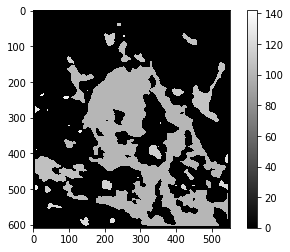

In [12]:
a = clustering(LMLO_density, diffzml,diffxml)
plt.imshow(a, cmap = 'gray')
plt.colorbar()